In [1]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [2]:
# import wave 19 (post election) panel data
df_18 = pd.read_spss('./data/wave18.sav')
df_19 = pd.read_spss('./data/wave19.sav')
df_backup18 = df_18.copy()
df_backup19 = df_19.copy()

In [3]:
#reset df
df_18 = df_backup18.copy()
df_19 = df_backup19.copy()

### Target variable cleaning

In [6]:
#drop rows of participants who did not vote for one of the major parties
for df in [df_18, df_19]:
    df.drop(df[df['generalElectionVote'] == 'An independent candidate'].index, axis=0, inplace = True)
    df.drop(df[df['generalElectionVote'] == 'Other'].index, axis=0, inplace = True)
    df.drop(df[df['generalElectionVote'] == "Don't know"].index, axis=0, inplace = True)
    df['generalElectionVote'] = df['generalElectionVote'].cat.remove_unused_categories()

In [7]:
#drop rows of participants who did not know if they voted
for df in [df_18]:
    #replace nans with DNV label
    df['generalElectionVote'].replace({'I would/did not vote': 'DNV'}, inplace=True)
#     df['generalElectionVote'] = df['generalElectionVote'].cat.add_categories("DNV")
    df['generalElectionVote'].fillna('DNV', inplace=True)
    df.rename(columns={'generalElectionVote': 'predictVote'}, inplace=True)
for df in [df_19]:
    df.drop(df[df['p_turnout_2019'] == "Don't know"].index, axis=0, inplace = True)
    df.drop(df[df['p_turnout_2019'] == "nan"].index, axis=0, inplace = True)
    df['p_turnout_2019'] = df['p_turnout_2019'].cat.remove_unused_categories()
    #replace nans with DNV label
    df['generalElectionVote'] = df['generalElectionVote'].cat.add_categories("DNV")
    df['generalElectionVote'].fillna('DNV', inplace=True)
    df.rename(columns={'generalElectionVote': 'actualVote'}, inplace=True)

In [8]:
df_18 = df_18.filter(['id', 'predictVote'])
df_19 = df_19.filter(['id', 'actualVote'])

In [9]:
# merge pre-election and post-election survey
df = pd.merge(df_18, df_19, on='id')
df.head()

,id,predictVote,actualVote
0,29164.0,DNV,DNV
1,68705.0,DNV,DNV
2,70863.0,Conservative,Conservative
3,52982.0,Conservative,Conservative
4,30819.0,Conservative,Conservative


In [10]:
from sklearn.metrics import accuracy_score
actual = df['actualVote'].to_numpy()
predict = df['predictVote'].to_numpy()
accuracy = accuracy_score(actual, predict)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 85.08%


In [11]:
from sklearn import metrics
labels = ['Conservative', 'Labour', 'Liberal Democrat', 'DNV', 'Scottish National Party (SNP)', 'Green Party', 'Brexit Party', 'Plaid Cymru', 'United Kingdom Independence Party (UKIP)']
cm = metrics.confusion_matrix(actual, predict, labels)
cm

array([[9142,   71,  119,  161,    7,   23,  426,    4,   28],
       [ 106, 5291,  525,  122,   14,  136,   45,   18,    7],
       [ 107,  132, 2335,   37,    6,   41,    3,    1,    0],
       [ 312,  279,  142, 1145,   24,   53,  101,    3,   18],
       [   4,   32,   16,   20,  842,    9,    4,    0,    0],
       [  31,   47,   63,   21,    1,  415,    9,    0,    3],
       [  65,    8,    3,    9,    1,    3,  481,    1,    7],
       [   5,    7,    9,    0,    0,    4,    1,   94,    0],
       [   2,    0,    0,    2,    0,    1,    6,    0,    8]],
      dtype=int64)

In [12]:
df['actualVote'].value_counts(normalize=True)

Conservative                                0.429882
Labour                                      0.269791
Liberal Democrat                            0.114652
DNV                                         0.089456
Scottish National Party (SNP)               0.039926
Green Party                                 0.025411
Brexit Party                                0.024894
Plaid Cymru                                 0.005168
United Kingdom Independence Party (UKIP)    0.000818
Name: actualVote, dtype: float64

In [13]:
count = 0
con = 0
lab = 0
lib = 0
dnv = 0
snp = 0
green = 0
brexit = 0
plaid = 0
ukip = 0

for i in range(len(predict)):
    if predict[i] != actual[i]:
        if actual[i] == 'Conservative':
            con += 1
            count += 1
        if actual[i] == 'Labour':
            lab += 1
            count += 1
        if actual[i] == 'DNV':
            dnv += 1
            count += 1
        if actual[i] == 'Liberal Democrat':
            lib += 1
            count += 1
        if actual[i] == 'Scottish National Party (SNP)':
            snp += 1
            count += 1
        if actual[i] == 'Green Party':
            green += 1
            count += 1
        if actual[i] == 'Brexit Party':
            brexit += 1
            count += 1
        if actual[i] == 'Plaid Cymru':
            plaid += 1
            count += 1
        if actual[i] == 'United Kingdom Independence Party (UKIP)':
            ukip += 1
            count += 1

print('Voted for this party despite saying they would vote for another:')
print('Con:', con/count)
print('Lab:', lab/count)
print('Lib:', lib/count)
print('DNV:', dnv/count)
print('SNP:', snp/count)
print('Green:', green/count)
print('Brexit:', brexit/count)
print('Plaid:', plaid/count)
print('Ukip:', ukip/count)

Voted for this party despite saying they would vote for another:
Con: 0.24213564213564215
Lab: 0.2808080808080808
Lib: 0.09437229437229437
DNV: 0.268975468975469
SNP: 0.024531024531024532
Green: 0.050505050505050504
Brexit: 0.027994227994227995
Plaid: 0.007503607503607504
Ukip: 0.0031746031746031746


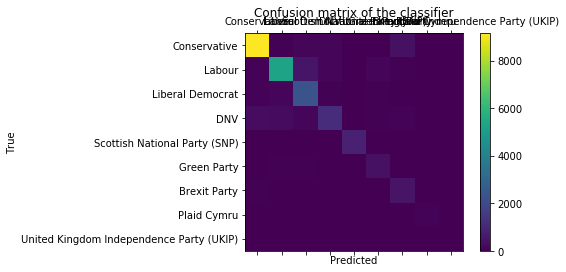

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()